# Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## 1. Read the column description and ensure you understand each attribute well

In [1]:
#Importing the Numpy & Pandas libraries
import numpy as np
import pandas as pd

In [2]:
#Read the Data from CSV file
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', index_col='ID')

In [3]:
#Check the top 5 rows to see if DataFrame is loaded as expected
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Understanding of each attribute:
To understand better, I downloaded the column Description from Kaggle & have mentioned my understanding as below:

**ID:** Customer ID - Key to uniquely identify the Customer

**Age:** Customer's age in completed years - Age of the Customer in completed years

**Experience:** #years of professional experience - Years of experience of the Customer

**Income:** Annual income of the customer ($000) - Annual income of the Customer in thousand Dollars

**ZIPCode:** Home Address ZIP code. - ZIP Code of Customer's Home Address

**Family:** Family size of the customer - No. of family members in Customer's family

**CCAvg:** Avg. spending on credit cards per month ($000) - Average Customer spending on Credit card in thousand Dollars

**Education:** Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional - Education level of customer denoted by 1 for Under-graduates, 2 for Graduates & 3 for Advanced/Professional Education qualifications

**Mortgage:** Value of house mortgage if any. ($000) - Customer's house mortgage value in thousand Dollars if any

**Personal Loan:** Did this customer accept the personal loan offered in the last campaign? - This is the Target variable. It tells whether the Customer targeted in previous campaign took Personal Loan or not. 0 denotes Customer didn't take Personal Loan & 1 denotes that the Customer took the Personal Loan.

**Securities Account:** Does the customer have a securities account with the bank? - It tells us whether the Customer has Securities Account with the Bank. 0 denotes Customer doesn't have Securities Account & 1 denotes Customer has Securities Account.

**CD Account:** Does the customer have a certificate of deposit (CD) account with the bank? - It tells us if the Customer has Savings Account with the Bank. 0 denotes Customer doesn't have Savings Account & 1 denotes Customer has Savings Account.

**Online:** Does the customer use internet banking facilities? - It tells if the Customer has Internet Banking facility or not. 0 denotes Cusomer doesn't have Internet Banking facility & 1 denotes Customer has Internet Banking Facility.

**CreditCard:** Does the customer use a credit card issued by UniversalBank? - It tells if Customer has Credit Card issued by Universal Bank. 0 denotes Customer doesn't have Credit Card & 1 denotes Customer has Credit Card.

## 2. Study the data distribution in each attribute, share your findings. (10 points)

In [4]:
#Import matplotlib & seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#First studying the 5 point summary to check if all the Data are present & taking a look at median & mean to roughly understand the data distribution
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


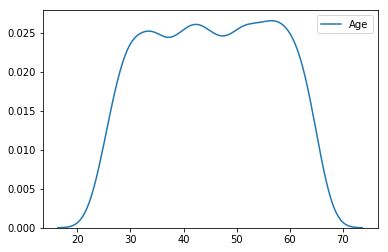

In [6]:
#KDE of Age
sns.kdeplot(df['Age'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


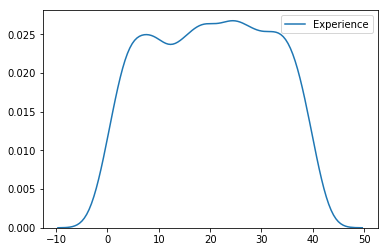

In [7]:
#KDE of Experience
sns.kdeplot(df['Experience'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


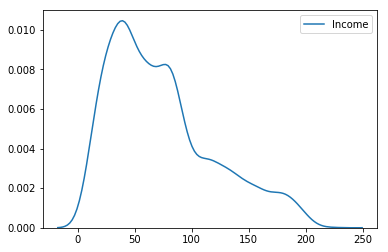

In [8]:
#KDE of Income
sns.kdeplot(df['Income'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


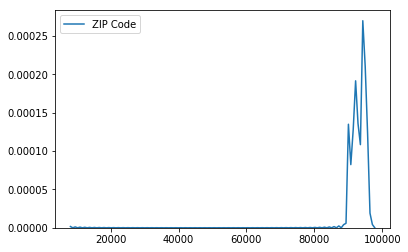

In [9]:
#KDE of Zipcode
sns.kdeplot(df['ZIP Code'])
plt.show()

[]

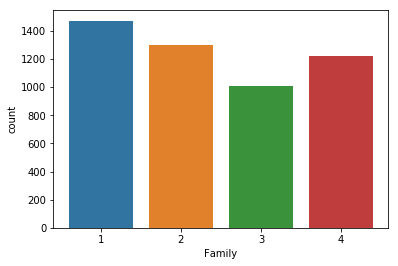

In [10]:
#Countplot for Family
sns.countplot(df['Family'])
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


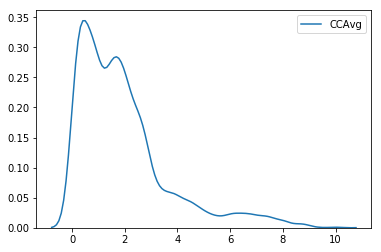

In [11]:
#KDE of CCAvg
sns.kdeplot(df['CCAvg'])
plt.show()

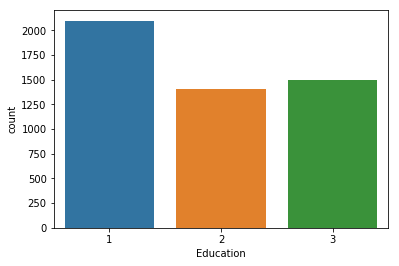

In [12]:
#Countplot for Education
sns.countplot(df['Education'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


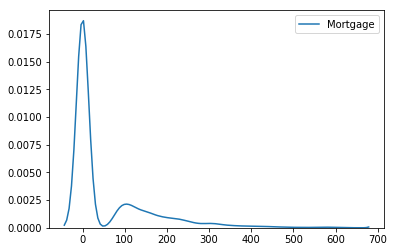

In [13]:
#KDE of Mortgage
sns.kdeplot(df['Mortgage'])
plt.show()

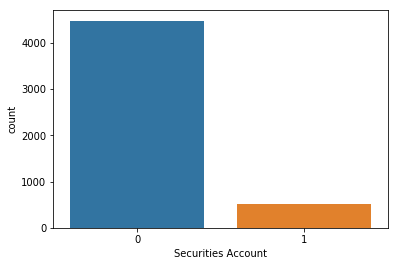

In [14]:
#Countplot of Securities Account
sns.countplot(df['Securities Account'])
plt.show()

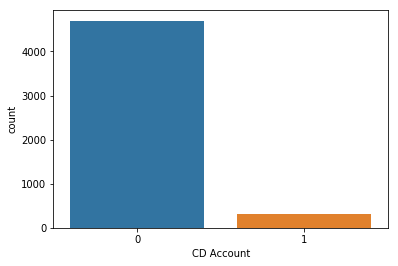

In [15]:
#Countplot of CD Account
sns.countplot(df['CD Account'])
plt.show()

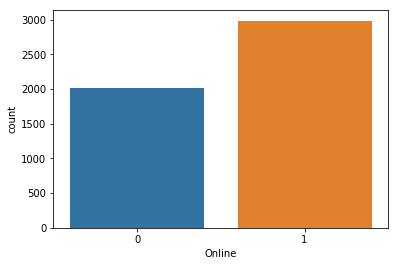

In [16]:
#Countplot of Online
sns.countplot(df['Online'])
plt.show()

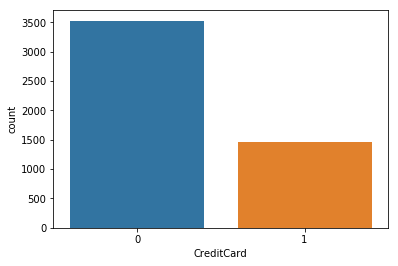

In [17]:
#Countplot of CreditCard
sns.countplot(df['CreditCard'])
plt.show()

### Findings about Data distribution of each attribute:
From 5-point analysis, we can see that there are no missing values for any attributes. There are many 0s in Mortgage attribute but that is normal. And there are few negative values for Experience column. It might be a sampling or data entry mistake or it might suggest that the Customer is planning to start working in so many years in future. But, keeping negative values for Experience is meaningless & hence we will replace them with 0s.

**Below are the findings about Data distribution from KDE / countplots as applicable:**

**Age:** Age is more or less uniformly distibuted with little tappering towards tails. But, it also shows 3 local peaks which might suggest that either the data-points from different samples are mixed or it might also mean that some Customers have mentioned their age in round figures of 5s or 10s. But, since the peaks aren't prominent, we can continue with this data for modelling.

**Experience:** Experience has very similar distribution like Age. And as said above, we would put negative values as 0s which might change the distribution a little.

**Income:** Income is positively skewed which is natural. But, it has an unusal local peak at around $80,000 with a global peak at around 40,000 annualy.

**ZIPCode:** ZIP Code distribution is negatively skewed but as we can see, we have few ZIP Codes with 4 digit values. There are 3 peaks suggesting us that there would be many samples taken from 3 zones with samples from other zones distributed sparsely. Technically speaking, giving numerical weightage to zones is wrong & we have many different values of ZIP Codes. So, treating it with one hot-encoding would not be a good idea. So, we should rather drop this attribute from our model building.

**Family:** Count plot for Family size suggests that Customers stay in nuclear families with no more than 4 family members. It has highest peak for 1 member suggesting most of the customers are single & would be staying away from their own town to pursue their careers. Next highest count is for 2 which suggests couples. Next highest count is for 4 & then 3 which suggests Customers either don't prefer kids or if they prefer having kids, they prefer them 2 over 1 kids.

**CCAvg:** Distribution of this attribute is positively skewed with 2 peaks which suggests that most of the Customers don't use Credit cards & if they use credit cards, maximum of them have average Credit Card spending of little less than $2,000/month.

**Education:** Countplot of this attribute shows us that maximum customers are under-graduates. Next peak is for Adnavced/Professional Education qualification which is slightly grater than Graduates. This means maximum Customers pursue only Under-graduate qualification & if they go for higher studies, more people opt for advanced/Professional Educational qualifications than simply doing Graduation.

**Mortgage:** Distribution of this attribute is positively skewed with 2 peaks which suggests that vast majority of Customers don't have any Mortgage & if they have maximum have it around $100,000.

**Securities Account:** Countplot shows us that vast majority of Customers don't have Securities Account.

**CD Account:** Countplot shows us that vast majority of Customers don't have CD Account.

**Online:** Countplot shows that maximum people have Online Banking facility

**CreditCard:** Countplot shows maximum people don't have Credit Cards.

In [18]:
#Dropping ZIPCode column
df.drop('ZIP Code', axis=1, inplace=True)

#Treating -ve Experience
df['Experience'].clip_lower(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


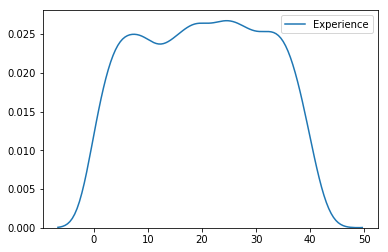

In [19]:
#Replotting KDE of Experience after treating -ve values
sns.kdeplot(df['Experience'])
plt.show()

### Findings about Data distribution of each attribute (contd.):
After treating negative values for Experience, the distribution doesn't change much.

## 3. Get the target column distribution. Your comments

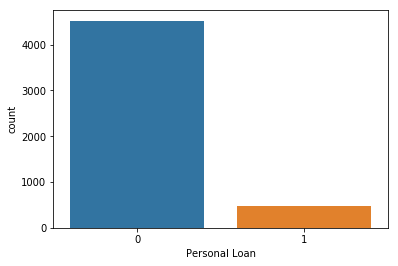

In [20]:
#Countplot of Personal Loan
sns.countplot(df['Personal Loan'])
plt.show()

### Comments about target column distribution:
Seeing target column's distribution, we can see that around 500 Customers took Personal Loan out of 5000 targeted. This is in line with 480 Customers taking Personal loan as per description of the Problem.

Since, we have less than 10% data points, KNN model will give poor results as Customers who didn't take Personal Loans would out-weigh the Customers who took Personal Loans.

Naïve Bayes model assumes that all attributes are independent. Without plotting pairplots or studying correlation of attributes with one another, it is difficult to say that attributes would be independent or not. But, with common sense we can say that Experience would be somewhat correlated with Age & Income would be highly correlated with Experience & Education. There might be other correlations as well. So Naïve Bayes model might not work well.

Logistic Regression would work well on linear data. Without studying attributes further it's difficult to say if attributes have linear relationship or not.

## 4. Split the data into training and test set in the ratio of 70:30 respectively

In [21]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('Personal Loan', axis=1), df['Personal Loan'], test_size=0.3) # 70% training and 30% test

## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)
## 6. Print the confusion matrix for all the above models (10 points)

In [22]:
#Import LogisticRegression module from Scikit learn Linear model
from sklearn.linear_model import LogisticRegression

In [23]:
#Initiate LogisticRegression
model = LogisticRegression()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Logisitic Regression model on Training data is", model_train_score)
print("Accuracy of the Logisitic Regression model on Testing data is", model_test_score)

#Import metrics module from Scikit learn library
from sklearn import metrics

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Logisitic Regression model on Training data is 0.9497142857142857
Accuracy of the Logisitic Regression model on Testing data is 0.9466666666666667
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.96      0.99      0.97      3163
          1       0.82      0.61      0.70       337

avg / total       0.95      0.95      0.95      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.96      0.98      0.97      1357
          1       0.79      0.60      0.68       143

avg / total       0.94      0.95      0.94      1500

Confusion matrix is as follows:
 [[1334   23]
 [  57   86]]


In [24]:
#Import KNN module from Scikit learn Neighbors module
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#Initialize KNN object with 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9542857142857143
Accuracy of the KNN model on Testing data is 0.9053333333333333
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.96      0.99      0.97      3163
          1       0.83      0.66      0.74       337

avg / total       0.95      0.95      0.95      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.94      0.96      0.95      1357
          1       0.50      0.37      0.43       143

avg / total       0.89      0.91      0.90      1500

Confusion matrix is as follows:
 [[1305   52]
 [  90   53]]


In [26]:
#We are getting very poor test data accuracy. Increasing number of neighbors might give more chance of non Personal Loan takers to outvote Perdonal Loan takers due to number. Nevertheless, let's try with 5 neighbors
#Initialize KNN object with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9374285714285714
Accuracy of the KNN model on Testing data is 0.908
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.95      0.98      0.97      3163
          1       0.76      0.51      0.61       337

avg / total       0.93      0.94      0.93      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      1357
          1       0.53      0.36      0.43       143

avg / total       0.90      0.91      0.90      1500

Confusion matrix is as follows:
 [[1311   46]
 [  92   51]]


In [27]:
#Import GaussianNB module from Scikit Learn Naive bayes module
from sklearn.naive_bayes import GaussianNB

In [28]:
#Initialize GaussianNB object
model = GaussianNB()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Naive Bayes model on Training data is", model_train_score)
print("Accuracy of the Naive Bayes model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Naive Bayes model on Training data is 0.8842857142857142
Accuracy of the Naive Bayes model on Testing data is 0.882
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.95      0.92      0.93      3163
          1       0.43      0.58      0.49       337

avg / total       0.90      0.88      0.89      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.96      0.91      0.93      1357
          1       0.42      0.62      0.50       143

avg / total       0.91      0.88      0.89      1500

Confusion matrix is as follows:
 [[1235  122]
 [  55   88]]


### Inference:
We can see that Logisitc Regression is giving better results but results for KNN & Naive Bayes are quite poor.

Let's try scaling our attributes using Z-score & retry modelling them

In [29]:
#Importing zscore module from Scientific Python stats module
from scipy.stats import zscore

In [30]:
df_scaled = df
df_scaled['Age'] = zscore(df['Age'])
df_scaled['Experience'] = zscore(df['Experience'])
df_scaled['Income'] = zscore(df['Income'])
df_scaled['Family'] = zscore(df['Family'])
df_scaled['CCAvg'] = zscore(df['CCAvg'])
df_scaled['Education'] = zscore(df['Education'])
df_scaled['Mortgage'] = zscore(df['Mortgage'])

#No need to transform binary attributes

In [31]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('Personal Loan', axis=1), df_scaled['Personal Loan'], test_size=0.3) # 70% training and 30% test

In [32]:
#Initiate LogisticRegression
model = LogisticRegression()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Logisitic Regression model on Training data is", model_train_score)
print("Accuracy of the Logisitic Regression model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Logisitic Regression model on Training data is 0.9525714285714286
Accuracy of the Logisitic Regression model on Testing data is 0.948
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.96      0.99      0.97      3172
          1       0.83      0.62      0.71       328

avg / total       0.95      0.95      0.95      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.96      0.98      0.97      1348
          1       0.81      0.64      0.71       152

avg / total       0.94      0.95      0.95      1500

Confusion matrix is as follows:
 [[1325   23]
 [  55   97]]


In [33]:
#Initialize KNN object with 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9771428571428571
Accuracy of the KNN model on Testing data is 0.962
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99      3172
          1       1.00      0.76      0.86       328

avg / total       0.98      0.98      0.98      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.96      1.00      0.98      1348
          1       0.98      0.64      0.77       152

avg / total       0.96      0.96      0.96      1500

Confusion matrix is as follows:
 [[1346    2]
 [  55   97]]


In [34]:
#We got very good test data accuracy this time. Increasing number of neighbors might give more chance of non Personal Loan takers to outvote Perdonal Loan takers due to number. Nevertheless, let's try with 5 neighbors
#Initialize KNN object with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9702857142857143
Accuracy of the KNN model on Testing data is 0.9606666666666667
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.97      1.00      0.98      3172
          1       0.99      0.69      0.81       328

avg / total       0.97      0.97      0.97      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.96      1.00      0.98      1348
          1       1.00      0.61      0.76       152

avg / total       0.96      0.96      0.96      1500

Confusion matrix is as follows:
 [[1348    0]
 [  59   93]]


In [35]:
#Initialize GaussianNB object
model = GaussianNB()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Naive Bayes model on Training data is", model_train_score)
print("Accuracy of the Naive Bayes model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Naive Bayes model on Training data is 0.8851428571428571
Accuracy of the Naive Bayes model on Testing data is 0.88
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       0.96      0.91      0.94      3172
          1       0.42      0.61      0.50       328

avg / total       0.91      0.89      0.89      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.95      0.91      0.93      1348
          1       0.43      0.60      0.50       152

avg / total       0.90      0.88      0.89      1500

Confusion matrix is as follows:
 [[1229  119]
 [  61   91]]


### Inference (contd.):
As we saw, Logistic Regression model gave better results before scaling.

It's accuracy didn't change much on scaled data.

But, since distance of higher magnitude attributes out weigh the lower magnitude attributes, we saw that KNN result was much better after scaling the data.

But, since we have more than 90% data points for non Personal Loan takers, if we increase the number of neighbors, they will begin out voting the Personal Loan taker neighbors. Hence, increasing K neighbor value is starting to deteriorate the perfromance. But for K=3, we are getting very good results. In fact, even F1-score is good for Personal Loan takers for KNN with K=3 on scaled data. For this reason, let's also try with K=1 & see if the accuracy improves further.

Naive Bayes model's results are very poor, both before scaling & after scaling the data.

In [36]:
#Initialize KNN object with 1 neighbor
model = KNeighborsClassifier(n_neighbors=1)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 1.0
Accuracy of the KNN model on Testing data is 0.9626666666666667
Classification Report for Training data is:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3172
          1       1.00      1.00      1.00       328

avg / total       1.00      1.00      1.00      3500

Classification Report for Testing data is:
              precision    recall  f1-score   support

          0       0.97      0.99      0.98      1348
          1       0.90      0.71      0.79       152

avg / total       0.96      0.96      0.96      1500

Confusion matrix is as follows:
 [[1336   12]
 [  44  108]]


### Inference (contd.):
The accuracy improves a little bit for K=1 for KNN model with slightly better F1 score. So, before implementing KNN with K=1 or K=3, we can test it again with few more random train test data split & if the results are consistently better for K=1, we can take a call accordingly to choose that model as the best suited to predict the Personal loan takers & we can focus to target only those Customers with limited marketing budget.

## 7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

### Reasoning on which is best model:
After scaling the data, KNN proved to be the best model. Naturally, KNN works well on scaled data whereas we don't see much improvement for Logistic Regression or Naive Bayes models.

Logistic Regression accuracy might be on a lower side because we have many features & there might not be linear relation between all features in which case Logistic Regression doesn't work well.

For Naive-Bayes, it assumes independent attributes but with common sense we can see that there are many dependent attributes & hence, it might not have given good results.

On other hand, though we had huge number of data points for Customers not opting for Personal Loans, selecting lower value of K did the trick for KNN to emerge as the best model suited to predict if a given liability customer will take Personal Loans or not.